In [9]:
#here we import different modules for data analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Number of morbidity of patients by active tuberculosis by sex and age 
#http://www.stat.kg/en/opendata/category/255/

In [10]:
#here we load the dataset to the df variable
df = pd.read_csv('tuberLinRegr.csv')
df.info() #here we receive info about columns and rows, which of them are null/non-null
#also we can get info about datatypes of the objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    3 non-null      object
 1   2011    3 non-null      object
 2   2012    3 non-null      object
 3   2013    3 non-null      object
 4   2014    3 non-null      object
 5   2015    3 non-null      object
 6   2016    3 non-null      object
 7   2017    3 non-null      object
 8   2018    3 non-null      object
 9   2019    3 non-null      object
 10  2020    3 non-null      object
 11  2021    3 non-null      object
dtypes: object(12)
memory usage: 416.0+ bytes


In [11]:
df.head()#here we look at the first part of the dataset, so we can
#see what is the general structure of the dataset(its features)

,Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total,5 535,5 851,5 859,5 898,5 853,5 680,5 616,5 680,5 096,3 518,3 891
1,men,3 247,3 433,3 319,3 281,3 334,3 172,3 188,3 172,2 921,2 014,2 192
2,women,2 288,2 418,2 540,2 617,2 519,2 508,2 428,2 508,2 175,1 504,1 699


In [12]:
df = df.set_index('Year')
#here I change indexing from primary-key like to indexing via 'Year' column

In [13]:
df = df.T#here I make transposing (changing columns and rows vice versa),
#so it becomes convenient to work with this dataframe


In [501]:
df.head(20)#so we can see how the dataframe looks like after the operations
#even at this stage by simple checking of the table I see the sharp decrease
#of total number of tuberculosis diagnosed cases in 2020 and 2021, from more 
#than 5000 to about 3500-4000

Year,Total,men,women
2011,5 535,3 247,2 288
2012,5 851,3 433,2 418
2013,5 859,3 319,2 540
2014,5 898,3 281,2 617
2015,5 853,3 334,2 519
2016,5 680,3 172,2 508
2017,5 616,3 188,2 428
2018,5 680,3 172,2 508
2019,5 096,2 921,2 175
2020,3 518,2 014,1 504


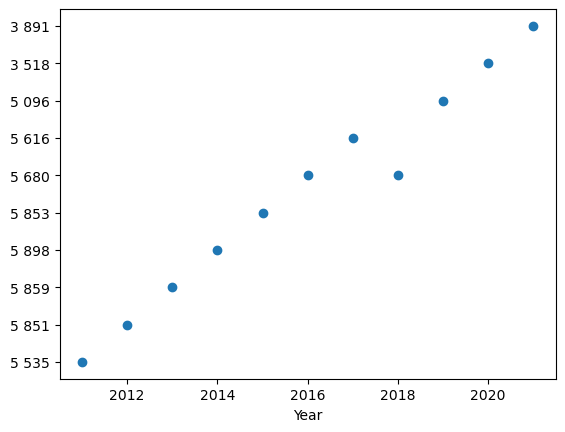

In [14]:
#this scatter shows 2 absolutely same numbers of people with tubeerculosis
#diagnosed in the years 2016 and 2018 - 5680
plt.scatter(np.arange(2011, 2022, 1), df['Total'])
plt.xlabel('Year')
plt.show()

In [16]:
df1 = df.copy()#here I make a copy of the dataset, so I can manipulate 
#the copied dataset and keep original one without changes

In [18]:
df1.describe()
#strange thing about this data: years 2016 and 2018 have the same numbers
#in all three columns: Total 5680, men 3172, women 2508.

Year,Total,men,women
count,11,11,11
unique,10,10,10
top,5 680,3 172,2 508
freq,2,2,2


In [20]:
#here I have decided to change the datatypes of the data from 'object' to 'float'
#the reason for doing this is in the fact that many functions and operations don't
#work properly with different datatypes, as an example, please look at the function
#describe() in above and in below
df1['men'] = (df1['men'].astype(str).str.split()).apply(lambda x: float(x[0]))
df1['women'] = (df1['women'].astype(str).str.split()).apply(lambda x: float(x[0]))
df1['Total'] = (df1['Total'].astype(str).str.split()).apply(lambda x: float(x[0]))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2011 to 2021
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   11 non-null     float64
 1   men     11 non-null     float64
 2   women   11 non-null     float64
dtypes: float64(3)
memory usage: 352.0+ bytes


In [22]:
#here we can get more statistical data, such as the mean (average), the standard deviation (std),
#which shows dispersion of the data around the mean value, also we get quantiles and the range (min/max)
df1.describe()

Year,Total,men,women
count,11.000000,11.000000,11.000000
mean,4.636364,2.727273,1.818182
std,0.809040,0.467099,0.404520
min,3.000000,2.000000,1.000000
25%,5.000000,2.500000,2.000000
50%,5.000000,3.000000,2.000000
75%,5.000000,3.000000,2.000000
max,5.000000,3.000000,2.000000


<AxesSubplot:>

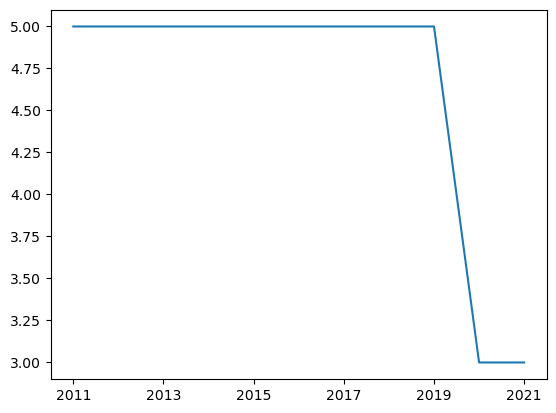

In [24]:
#now we can see again a sharp decrease of total number of tuberculosis diagnosed 
#in 2020-2021, so I can assume the reason was SARS CoV-2, started in 2020
df1['Total'].plot()

In [ ]:
#CONCLUSION:  I can emphasize 3 outcomes after working with the data:
#1) there's a problem with datatypes, which is fixed with the loss of some
#info which could be useful for the analysis, along with this maybe
#2) another inconsistency with data can be revealed, bcz 2106 and 2018 years
#have absolutely same numbers in all 3 features(total/men/women)
#3) there's a sharp decrease of tuberculosis diagnosed cases in the years 
#2020-2021, I can connect this to the pandemic situation in Kyrgyzstan

In [ ]:
#P.S.: There are also some other Data Science & Machine Learning tools
#whcih could be worked out and implemented, for example, Linear and Logistic
#Regressions for making 'predictions', approximation, and classification
#different types of Naive Bayes, Decision Trees, Random Forests, SVM,
#SVD, PCA, k-means, k-NN, different types of Deep Learning. 